Fadwa Ramadan Ali 2024334


## install spark

In [299]:
!apt-get install openjdk-8-jdk-headless -qq> /dev/null

In [300]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz


In [301]:
!tar xf spark-3.3.2-bin-hadoop3.tgz

In [302]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.2-bin-hadoop3'

In [303]:
!pip install -q findspark
import findspark

In [304]:
findspark.init()

In [305]:
findspark.find()

'/content/spark-3.3.2-bin-hadoop3'

In [306]:
from pyspark.sql.functions import col

In [307]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("linkedinData").getOrCreate()

In [308]:
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [309]:
import pyspark

sc = pyspark.SparkContext.getOrCreate()


In [310]:
import pyspark

sc = pyspark.SparkContext.getOrCreate()
sc.stop()

sc = pyspark.SparkContext(appName="mapsandlazyevaluationdag")


# upload datasets

In [311]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [312]:
import pyspark
from pyspark.sql import SparkSession

# Create a new SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()



In [313]:
dataset_path2 = '/content/drive/MyDrive/BigData/public_use-industry-employment-growth.csv'
df2 =spark.read.csv(dataset_path2, header=True, inferSchema=True)
df2.show()

+------------+--------------------+--------------------+-----------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+
|country_code|        country_name|           wb_region|  wb_income|isic_section_index|   isic_section_name|industry_id|       industry_name|growth_rate_2015|growth_rate_2016|growth_rate_2017|growth_rate_2018|growth_rate_2019|
+------------+--------------------+--------------------+-----------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+
|          ae|United Arab Emirates|Middle East & Nor...|High income|                 B|Mining and quarrying|         56|     Mining & Metals|           7.80%|           5.85%|           4.34%|           1.00%|          -0.06%|
|          ae|United Arab Emirates|Middle East & Nor...|High income|                 B|Minin

In [314]:
dataset_path3 = '/content/drive/MyDrive/BigData/public_use-Country-migration.csv'
df3 =spark.read.csv(dataset_path3, header=True, inferSchema=True)
df3.show()

+-----------------+--------------------+---------+---------+----------------------+----------------------+-------------------+-------------------+----------+-----------+------------------------+------------------------+----------------+----------------+----------------+----------------+----------------+----+----+----+----+----+----+----+----+----+
|base_country_code|   base_country_name| base_lat|base_long|base_country_wb_income|base_country_wb_region|target_country_code|target_country_name|target_lat|target_long|target_country_wb_income|target_country_wb_region|net_per_10K_2015|net_per_10K_2016|net_per_10K_2017|net_per_10K_2018|net_per_10K_2019|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|
+-----------------+--------------------+---------+---------+----------------------+----------------------+-------------------+-------------------+----------+-----------+------------------------+------------------------+----------------+----------------+----------------+----------------+-------------

In [315]:
dataset_path4 = '/content/drive/MyDrive/BigData/public_use-Industry-migration.csv'
df4 =spark.read.csv(dataset_path4, header=True, inferSchema=True)
df4.show()

+------------+--------------------+-----------+--------------------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|country_code|        country_name|  wb_income|           wb_region|isic_section_index|   isic_section_name|industry_id|       industry_name|net_per_10K_2015|net_per_10K_2016|net_per_10K_2017|net_per_10K_2018|net_per_10K_2019|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|
+------------+--------------------+-----------+--------------------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|          ae|United Arab Emirates|High income|Middle East & Nor

In [316]:
dataset_path5 = '/content/drive/MyDrive/BigData/public_use-Skill-migration.csv'
df5 =spark.read.csv(dataset_path5, header=True, inferSchema=True)
df5.show()

+------------+------------+----------+----------+--------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|country_code|country_name| wb_income| wb_region|skill_group_id|skill_group_category|    skill_group_name|net_per_10K_2015|net_per_10K_2016|net_per_10K_2017|net_per_10K_2018|net_per_10K_2019|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|
+------------+------------+----------+----------+--------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|          af| Afghanistan|Low income|South Asia|          2549|         Tech Skills|Information Manag...|         -791.59|         -705.88|         -550.04|         -68

# clean the data

## check the null values

In [317]:
from pyspark.sql.functions import col

# Iterate over the columns and check for null values in df2
for column in df2.columns:
    null_count = df2.filter(col(column).isNull()).count()
    print("Null values in column '{}': {}".format(column, null_count))

##there r no null values in df1

Null values in column 'country_code': 0
Null values in column 'country_name': 0
Null values in column 'wb_region': 0
Null values in column 'wb_income': 0
Null values in column 'isic_section_index': 0
Null values in column 'isic_section_name': 0
Null values in column 'industry_id': 0
Null values in column 'industry_name': 0
Null values in column 'growth_rate_2015': 0
Null values in column 'growth_rate_2016': 0
Null values in column 'growth_rate_2017': 0
Null values in column 'growth_rate_2018': 0
Null values in column 'growth_rate_2019': 0


In [318]:
from pyspark.sql.functions import col

# Iterate over the columns and check for null values
for column in df3.columns:
    null_count = df3.filter(col(column).isNull()).count()
    print("Null values in column '{}': {}".format(column, null_count))

##there r null values in df1

Null values in column 'base_country_code': 0
Null values in column 'base_country_name': 0
Null values in column 'base_lat': 0
Null values in column 'base_long': 0
Null values in column 'base_country_wb_income': 0
Null values in column 'base_country_wb_region': 0
Null values in column 'target_country_code': 0
Null values in column 'target_country_name': 0
Null values in column 'target_lat': 0
Null values in column 'target_long': 0
Null values in column 'target_country_wb_income': 0
Null values in column 'target_country_wb_region': 0
Null values in column 'net_per_10K_2015': 0
Null values in column 'net_per_10K_2016': 0
Null values in column 'net_per_10K_2017': 0
Null values in column 'net_per_10K_2018': 0
Null values in column 'net_per_10K_2019': 0
Null values in column '_c17': 4148
Null values in column '_c18': 4148
Null values in column '_c19': 4148
Null values in column '_c20': 4148
Null values in column '_c21': 4148
Null values in column '_c22': 4148
Null values in column '_c23': 41

there are null values becoues of the invalid columns, i dicidid to delete the invaalid columns since they have no values

In [319]:
# List the columns with null values in df3
columns_with_null = ['_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25']

# Drop the columns with null values from df3
df3 = df3.drop(*columns_with_null)

# Display the updated DataFrame
df3.show()


+-----------------+--------------------+---------+---------+----------------------+----------------------+-------------------+-------------------+----------+-----------+------------------------+------------------------+----------------+----------------+----------------+----------------+----------------+
|base_country_code|   base_country_name| base_lat|base_long|base_country_wb_income|base_country_wb_region|target_country_code|target_country_name|target_lat|target_long|target_country_wb_income|target_country_wb_region|net_per_10K_2015|net_per_10K_2016|net_per_10K_2017|net_per_10K_2018|net_per_10K_2019|
+-----------------+--------------------+---------+---------+----------------------+----------------------+-------------------+-------------------+----------+-----------+------------------------+------------------------+----------------+----------------+----------------+----------------+----------------+
|               ae|United Arab Emirates|23.424076|53.847818|           High Income|  

In [320]:
from pyspark.sql.functions import col

# Iterate over the columns and check for null values in df4
for column in df4.columns:
    null_count = df4.filter(col(column).isNull()).count()
    print("Null values in column '{}': {}".format(column, null_count))


Null values in column 'country_code': 0
Null values in column 'country_name': 0
Null values in column 'wb_income': 0
Null values in column 'wb_region': 0
Null values in column 'isic_section_index': 0
Null values in column 'isic_section_name': 0
Null values in column 'industry_id': 0
Null values in column 'industry_name': 0
Null values in column 'net_per_10K_2015': 0
Null values in column 'net_per_10K_2016': 0
Null values in column 'net_per_10K_2017': 0
Null values in column 'net_per_10K_2018': 0
Null values in column 'net_per_10K_2019': 0
Null values in column '_c13': 5295
Null values in column '_c14': 5295
Null values in column '_c15': 5295
Null values in column '_c16': 5295
Null values in column '_c17': 5295
Null values in column '_c18': 5295
Null values in column '_c19': 5295
Null values in column '_c20': 5295
Null values in column '_c21': 5295
Null values in column '_c22': 5295
Null values in column '_c23': 5295
Null values in column '_c24': 5295
Null values in column '_c25': 5295


In [321]:
# List the columns with null values in df4
columns_with_null = ['_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25', '_c26', '_c27', '_c28', '_c29']

# Drop the columns with null values from df4
df4 = df4.drop(*columns_with_null)

# Display the updated DataFrame
df4.show()


+------------+--------------------+-----------+--------------------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+
|country_code|        country_name|  wb_income|           wb_region|isic_section_index|   isic_section_name|industry_id|       industry_name|net_per_10K_2015|net_per_10K_2016|net_per_10K_2017|net_per_10K_2018|net_per_10K_2019|
+------------+--------------------+-----------+--------------------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+
|          ae|United Arab Emirates|High income|Middle East & Nor...|                 C|       Manufacturing|          1|     Defense & Space|          378.74|          127.94|             8.2|           68.51|           49.55|
|          ae|United Arab Emirates|High income|Middle East & Nor...|                 J|Infor

In [322]:
from pyspark.sql.functions import col

# Iterate over the columns and check for null values in df5
for column in df5.columns:
    null_count = df5.filter(col(column).isNull()).count()
    print("Null values in column '{}': {}".format(column, null_count))


Null values in column 'country_code': 3030
Null values in column 'country_name': 3030
Null values in column 'wb_income': 3030
Null values in column 'wb_region': 3030
Null values in column 'skill_group_id': 3030
Null values in column 'skill_group_category': 3030
Null values in column 'skill_group_name': 3030
Null values in column 'net_per_10K_2015': 3030
Null values in column 'net_per_10K_2016': 3030
Null values in column 'net_per_10K_2017': 3030
Null values in column 'net_per_10K_2018': 3030
Null values in column 'net_per_10K_2019': 3030
Null values in column '_c12': 20647
Null values in column '_c13': 20647
Null values in column '_c14': 20647
Null values in column '_c15': 20647
Null values in column '_c16': 20647
Null values in column '_c17': 20647
Null values in column '_c18': 20647
Null values in column '_c19': 20647
Null values in column '_c20': 20647
Null values in column '_c21': 20647
Null values in column '_c22': 20647
Null values in column '_c23': 20647
Null values in column '_

In [323]:

# Iterate over the columns and check for null values in df5
for column in df5.columns:
    null_count = df5.filter(col(column).isNull()).count()
    print("Null values in column '{}': {}".format(column, null_count))


Null values in column 'country_code': 3030
Null values in column 'country_name': 3030
Null values in column 'wb_income': 3030
Null values in column 'wb_region': 3030
Null values in column 'skill_group_id': 3030
Null values in column 'skill_group_category': 3030
Null values in column 'skill_group_name': 3030
Null values in column 'net_per_10K_2015': 3030
Null values in column 'net_per_10K_2016': 3030
Null values in column 'net_per_10K_2017': 3030
Null values in column 'net_per_10K_2018': 3030
Null values in column 'net_per_10K_2019': 3030
Null values in column '_c12': 20647
Null values in column '_c13': 20647
Null values in column '_c14': 20647
Null values in column '_c15': 20647
Null values in column '_c16': 20647
Null values in column '_c17': 20647
Null values in column '_c18': 20647
Null values in column '_c19': 20647
Null values in column '_c20': 20647
Null values in column '_c21': 20647
Null values in column '_c22': 20647
Null values in column '_c23': 20647
Null values in column '_

In [324]:
# List the columns with null values in df5
columns_with_null = ['_c12','_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25', '_c26', '_c27', '_c28', '_c29']

# Drop the columns with null values from df5
df5 = df5.drop(*columns_with_null)

# Display the updated DataFrame
df5.show()


+------------+------------+----------+----------+--------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+
|country_code|country_name| wb_income| wb_region|skill_group_id|skill_group_category|    skill_group_name|net_per_10K_2015|net_per_10K_2016|net_per_10K_2017|net_per_10K_2018|net_per_10K_2019|
+------------+------------+----------+----------+--------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+
|          af| Afghanistan|Low income|South Asia|          2549|         Tech Skills|Information Manag...|         -791.59|         -705.88|         -550.04|         -680.92|        -1208.79|
|          af| Afghanistan|Low income|South Asia|          2608|     Business Skills|Operational Effic...|        -1610.25|         -933.55|         -776.06|         -532.22|         -790.09|
|          af| Afghanistan|Low income|So

the null vlues are acully empty rows and column becoue of the converting to CSV, thues i disided to drop them, as they have no effect on the analsyis.

In [325]:
# Drop the null values in df5
df5 = df5.dropna()

# Check if there are any remaining null values
if df5.count() == df5.na.drop().count():
    print("All null values have been dropped from df5")
else:
    print("Null values still exist in df5")


All null values have been dropped from df5


## duplicates

In [326]:
# Check duplicates in df2
df2_duplicates = df2.groupBy(df2.columns).count().where("count > 1")
if df2_duplicates.count() == 0:
    print("No duplicates found in df2")
else:
    num_duplicates = df2_duplicates.count()
    print(f"{num_duplicates} duplicate(s) found in df2")

# Check duplicates in df3
df3_duplicates = df3.groupBy(df3.columns).count().where("count > 1")
if df3_duplicates.count() == 0:
    print("No duplicates found in df3")
else:
    num_duplicates = df3_duplicates.count()
    print(f"{num_duplicates} duplicate(s) found in df3")

# Check duplicates in df4
df4_duplicates = df4.groupBy(df4.columns).count().where("count > 1")
if df4_duplicates.count() == 0:
    print("No duplicates found in df4")
else:
    num_duplicates = df4_duplicates.count()
    print(f"{num_duplicates} duplicate(s) found in df4")

# Check duplicates in df5
df5_duplicates = df5.groupBy(df5.columns).count().where("count > 1")
if df5_duplicates.count() == 0:
    print("No duplicates found in df5")
else:
    num_duplicates = df5_duplicates.count()
    print(f"{num_duplicates} duplicate(s) found in df5")

No duplicates found in df2
No duplicates found in df3
No duplicates found in df4
No duplicates found in df5


## check the invalis values

all values are valid in df1 for the caticorical column
but for the numbatric column it needs cleaning

for df2

In [327]:
# List of data types considered categorical
categorical_data_types = ['string', 'boolean']

# Identify the categorical columns in df2
categorical_columns_df2 = [column for column, dtype in df2.dtypes if dtype in categorical_data_types]

# Display the list of categorical column names
print("Categorical column names in df2:")
for column in categorical_columns_df2:
    print(column)


Categorical column names in df2:
country_code
country_name
wb_region
wb_income
isic_section_index
isic_section_name
industry_name
growth_rate_2015
growth_rate_2016
growth_rate_2017
growth_rate_2018
growth_rate_2019


In [328]:
# List of categorical column names in df3
categorical_columns_df3 = ["base_country_code", "base_country_name", "base_country_wb_income", "base_country_wb_region",
                           "target_country_code", "target_country_name", "target_country_wb_income",
                           "target_country_wb_region"]

# Iterate over the categorical columns in df3
for column in categorical_columns_df3:
    unique_values = df3.select(column).distinct().collect()
    print("Unique values in column '{}':".format(column))
    for row in unique_values:
        value = row[0]
        print(value)
    print("--------------------------".format(column))

    print()  # Add an empty line between columns


Unique values in column 'base_country_code':
ye
cr
mz
pr
us
eg
ps
ge
cl
il
bw
ro
uz
ba
jp
kw
ao
by
lv
vn
pl
cn
za
sk
bd
ir
mu
pt
ke
kh
in
au
ni
pk
sg
ae
iq
hk
be
qa
tw
gb
zm
np
cd
ec
ci
mg
fj
sa
co
tr
de
is
lu
tt
br
sd
gt
jo
es
hr
zw
rs
kr
af
it
uy
pe
py
ar
sv
jm
ph
bo
nl
hn
rw
ly
hu
mn
al
ca
tg
ve
my
tn
ee
nz
si
gr
lk
mt
cm
ml
ga
th
ch
ng
mk
gh
ma
do
lt
ht
sn
bj
pa
no
bg
ug
cu
pg
sy
mm
cy
at
dz
cz
ua
bs
kz
mx
az
et
bf
om
tz
am
fr
se
ie
dk
id
md
bh
fi
lb
na
mw
--------------------------

Unique values in column 'base_country_name':
Paraguay
Congo, Dem. Rep.
Senegal
Sweden
Taiwan, China
Macedonia, FYR
Philippines
Malaysia
Singapore
Fiji
Turkey
Malawi
Iraq
Germany
Afghanistan
Cambodia
Jordan
Rwanda
Sudan
France
Greece
Sri Lanka
Algeria
Togo
Argentina
Angola
Belgium
Iran, Islamic Rep.
Ecuador
Qatar
Albania
Madagascar
Finland
Ghana
Myanmar
Nicaragua
Benin
Peru
China
India
United States
Belarus
Kuwait
Malta
Chile
Puerto Rico
Venezuela, RB
Croatia
Bolivia
Nigeria
Gabon
Italy
Lithuania
Norway

all values are valid in df2

for df3

In [329]:
# List of data types considered categorical
categorical_data_types = ['string', 'boolean']

# Identify the categorical columns in df3
categorical_columns_df3 = [column for column, dtype in df3.dtypes if dtype in categorical_data_types]

# Display the list of categorical column names
print("Categorical column names in df3:")
for column in categorical_columns_df3:
    print(column)


Categorical column names in df3:
base_country_code
base_country_name
base_country_wb_income
base_country_wb_region
target_country_code
target_country_name
target_country_wb_income
target_country_wb_region


In [330]:
# List of categorical column names in df3
categorical_columns_df3 = ["base_country_code", "base_country_name", "base_country_wb_income", "base_country_wb_region",
                           "target_country_code", "target_country_name", "target_country_wb_income",
                           "target_country_wb_region"]

# Iterate over the categorical columns in df3
for column in categorical_columns_df3:
    unique_values = df3.select(column).distinct().collect()
    print("Unique values in column '{}':".format(column))
    for row in unique_values:
        value = row[0]
        print(value)
    print("--------------------------".format(column))

    print()  # Add an empty line between columns


Unique values in column 'base_country_code':
ye
cr
mz
pr
us
eg
ps
ge
cl
il
bw
ro
uz
ba
jp
kw
ao
by
lv
vn
pl
cn
za
sk
bd
ir
mu
pt
ke
kh
in
au
ni
pk
sg
ae
iq
hk
be
qa
tw
gb
zm
np
cd
ec
ci
mg
fj
sa
co
tr
de
is
lu
tt
br
sd
gt
jo
es
hr
zw
rs
kr
af
it
uy
pe
py
ar
sv
jm
ph
bo
nl
hn
rw
ly
hu
mn
al
ca
tg
ve
my
tn
ee
nz
si
gr
lk
mt
cm
ml
ga
th
ch
ng
mk
gh
ma
do
lt
ht
sn
bj
pa
no
bg
ug
cu
pg
sy
mm
cy
at
dz
cz
ua
bs
kz
mx
az
et
bf
om
tz
am
fr
se
ie
dk
id
md
bh
fi
lb
na
mw
--------------------------

Unique values in column 'base_country_name':
Paraguay
Congo, Dem. Rep.
Senegal
Sweden
Taiwan, China
Macedonia, FYR
Philippines
Malaysia
Singapore
Fiji
Turkey
Malawi
Iraq
Germany
Afghanistan
Cambodia
Jordan
Rwanda
Sudan
France
Greece
Sri Lanka
Algeria
Togo
Argentina
Angola
Belgium
Iran, Islamic Rep.
Ecuador
Qatar
Albania
Madagascar
Finland
Ghana
Myanmar
Nicaragua
Benin
Peru
China
India
United States
Belarus
Kuwait
Malta
Chile
Puerto Rico
Venezuela, RB
Croatia
Bolivia
Nigeria
Gabon
Italy
Lithuania
Norway

all values are valid in df3

df4:

In [331]:
# List of data types considered categorical
categorical_data_types = ['string', 'boolean']

# Identify the categorical columns in df4
categorical_columns_df4 = [column for column, dtype in df4.dtypes if dtype in categorical_data_types]

# Display the list of categorical column names
print("Categorical column names in df4:")
for column in categorical_columns_df4:
    print(column)


Categorical column names in df4:
country_code
country_name
wb_income
wb_region
isic_section_index
isic_section_name
industry_name


In [332]:
# List of categorical column names in df4
categorical_columns_df4 = ["country_code", "country_name", "wb_income", "wb_region", "isic_section_index",
                           "isic_section_name", "industry_name"]

# Iterate over the categorical columns in df4
for column in categorical_columns_df4:
    unique_values = df4.select(column).distinct().collect()
    print("Unique values in column '{}':".format(column))
    for row in unique_values:
        value = row[0]
        print(value)
    print("--------------------------".format(column))

    print()  # Add an empty line between columns


Unique values in column 'country_code':
ye
cr
mz
pr
us
eg
ps
ge
cl
il
bw
ro
uz
ba
jp
kw
ao
by
lv
vn
pl
cn
za
sk
bd
ir
mu
pt
ke
kh
in
au
ni
pk
sg
ae
iq
hk
be
qa
tw
gb
zm
np
cd
ec
ci
mg
fj
sa
co
tr
de
is
lu
tt
br
sd
gt
jo
es
hr
zw
rs
kr
af
it
uy
pe
ar
sv
jm
ph
bo
nl
hn
rw
ly
hu
mn
al
ca
ve
my
tn
ee
nz
si
gr
lk
mt
cm
ml
ga
th
ch
ng
mk
gh
ma
do
lt
ht
sn
bj
pa
no
bg
ug
cu
pg
sy
mm
cy
at
dz
cz
ua
bs
kz
mx
az
et
bf
om
tz
am
fr
se
ie
dk
id
md
bh
fi
lb
mw
--------------------------

Unique values in column 'country_name':
Congo, Dem. Rep.
Senegal
Sweden
Taiwan, China
Macedonia, FYR
Philippines
Malaysia
Singapore
Fiji
Turkey
Malawi
Iraq
Germany
Afghanistan
Cambodia
Jordan
Rwanda
Sudan
France
Greece
Sri Lanka
Algeria
Argentina
Angola
Belgium
Iran, Islamic Rep.
Ecuador
Qatar
Albania
Madagascar
Finland
Ghana
Myanmar
Nicaragua
Benin
Peru
China
India
United States
Belarus
Kuwait
Malta
Chile
Puerto Rico
Venezuela, RB
Croatia
Bolivia
Nigeria
Gabon
Italy
Lithuania
Norway
Spain
Cuba
Denmark
Bangladesh
Ir

there is no invlaus values in df4

df5:


In [333]:
# List of data types considered categorical
categorical_data_types = ['string', 'boolean']

# Identify the categorical columns in df5
categorical_columns_df5 = [column for column, dtype in df5.dtypes if dtype in categorical_data_types]

# Display the list of categorical column names
print("Categorical column names in df5:")
for column in categorical_columns_df5:
    print(column)


Categorical column names in df5:
country_code
country_name
wb_income
wb_region
skill_group_category
skill_group_name


In [334]:
# List of categorical column names in df5
categorical_columns_df5 = ["country_code","country_name",  "wb_income" ,"wb_region" ,"skill_group_category"
,"skill_group_name"]

# Iterate over the categorical columns in df5
for column in categorical_columns_df5:
    unique_values = df5.select(column).distinct().collect()
    print("Unique values in column '{}':".format(column))
    for row in unique_values:
        value = row[0]
        print(value)
    print("--------------------------".format(column))

    print()  # Add an empty line between columns


Unique values in column 'country_code':
ye
cr
mz
pr
us
eg
ps
ge
cl
il
bw
ro
uz
ba
jp
kw
ao
by
lv
vn
pl
cn
za
sk
bd
ir
mu
pt
kh
ke
in
au
ni
pk
sg
iq
ae
hk
be
qa
tw
gb
zm
np
cd
ec
ci
mg
fj
sa
co
tr
de
is
lu
tt
br
sd
gt
jo
hr
es
zw
rs
kr
af
it
uy
py
pe
ar
sv
jm
ph
bo
nl
hn
rw
ly
hu
mn
al
ca
tg
ve
my
tn
ee
nz
si
gr
mt
lk
cm
ml
ga
th
ch
ng
mk
gh
ma
do
lt
ht
sn
bj
pa
no
bg
ug
cu
pg
sy
mm
cy
dz
at
cz
ua
bs
kz
mx
az
et
bf
om
tz
am
fr
se
ie
dk
id
md
bh
fi
lb
na
mw
--------------------------

Unique values in column 'country_name':
Paraguay
Congo, Dem. Rep.
Senegal
Sweden
Taiwan, China
Macedonia, FYR
Philippines
Malaysia
Singapore
Fiji
Turkey
Malawi
Iraq
Germany
Afghanistan
Cambodia
Jordan
Rwanda
Sudan
France
Greece
Sri Lanka
Algeria
Togo
Argentina
Angola
Belgium
Iran, Islamic Rep.
Ecuador
Qatar
Albania
Madagascar
Finland
Ghana
Myanmar
Nicaragua
Benin
Peru
China
India
United States
Belarus
Kuwait
Malta
Chile
Puerto Rico
Venezuela, RB
Croatia
Bolivia
Nigeria
Gabon
Italy
Lithuania
Norway
Spain
Cub

df5 hv no invalid values as well alhumdullah

## check the outliers.

In [335]:
df3.describe().show()


+-------+-----------------+-----------------+------------------+------------------+----------------------+----------------------+-------------------+-------------------+------------------+------------------+------------------------+------------------------+------------------+-------------------+--------------------+--------------------+--------------------+
|summary|base_country_code|base_country_name|          base_lat|         base_long|base_country_wb_income|base_country_wb_region|target_country_code|target_country_name|        target_lat|       target_long|target_country_wb_income|target_country_wb_region|  net_per_10K_2015|   net_per_10K_2016|    net_per_10K_2017|    net_per_10K_2018|    net_per_10K_2019|
+-------+-----------------+-----------------+------------------+------------------+----------------------+----------------------+-------------------+-------------------+------------------+------------------+------------------------+------------------------+------------------+----

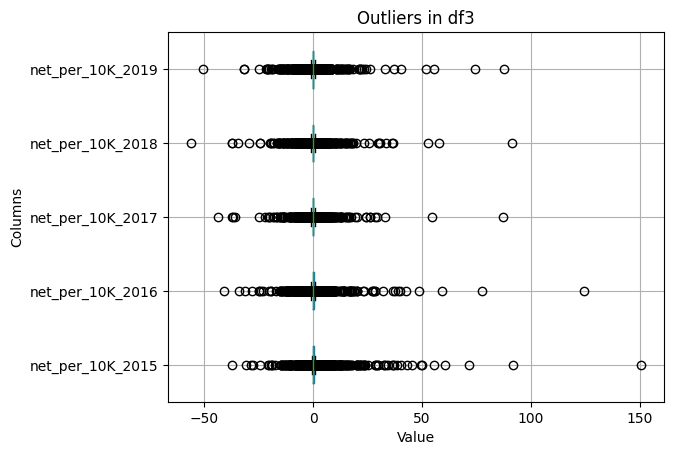

In [336]:
import matplotlib.pyplot as plt
import pandas as pd

# Select the columns to check for outliers
columns = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]

# Create a pandas DataFrame with the selected columns
data = pd.DataFrame(df3.select(columns).collect(), columns=columns)

# Create box plots for the columns
data.boxplot(column=columns, vert=False)

# Set the plot title and labels
plt.title("Outliers in df3")
plt.xlabel("Value")
plt.ylabel("Columns")

# Display the plot
plt.show()


remove the outlier in the net_per_10K_2015 column that is above 150 in df3

In [337]:
from pyspark.sql.functions import col

# Filter out the outlier
df3 = df3.filter(col("net_per_10K_2015") <= 150)

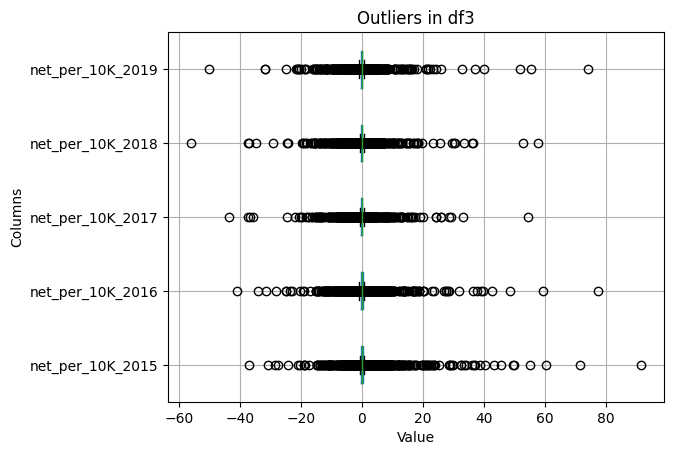

In [338]:
import matplotlib.pyplot as plt
import pandas as pd

# Select the columns to check for outliers
columns = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]

# Create a pandas DataFrame with the selected columns
data = pd.DataFrame(df3.select(columns).collect(), columns=columns)

# Create box plots for the columns
data.boxplot(column=columns, vert=False)

# Set the plot title and labels
plt.title("Outliers in df3")
plt.xlabel("Value")
plt.ylabel("Columns")

# Display the plot
plt.show()


In [339]:
df4.describe().show()


+-------+------------+------------+-------------------+-------------------+------------------+--------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|country_code|country_name|          wb_income|          wb_region|isic_section_index|   isic_section_name|       industry_id|    industry_name|  net_per_10K_2015|  net_per_10K_2016|  net_per_10K_2017|  net_per_10K_2018|  net_per_10K_2019|
+-------+------------+------------+-------------------+-------------------+------------------+--------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|        5295|        5295|               5295|               5295|              5295|                5295|              5295|             5295|              5295|              5295|              5295|              5295|              5295|
|   mean

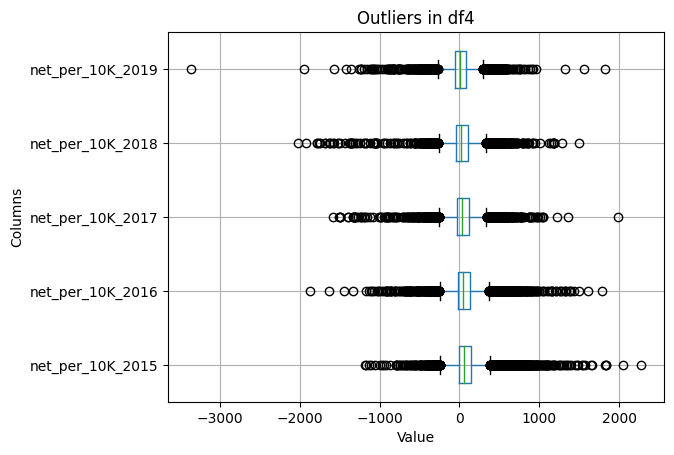

In [340]:

# Select the columns to check for outliers
columns = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]

# Create a pandas DataFrame with the selected columns
data = pd.DataFrame(df4.select(columns).collect(), columns=columns)

# Create box plots for the columns
data.boxplot(column=columns, vert=False)

# Set the plot title and labels
plt.title("Outliers in df4")
plt.xlabel("Value")
plt.ylabel("Columns")

# Display the plot
plt.show()


In [341]:
# Filter out the outlier
df4 = df4.filter(col("net_per_10K_2019") >= -3000)

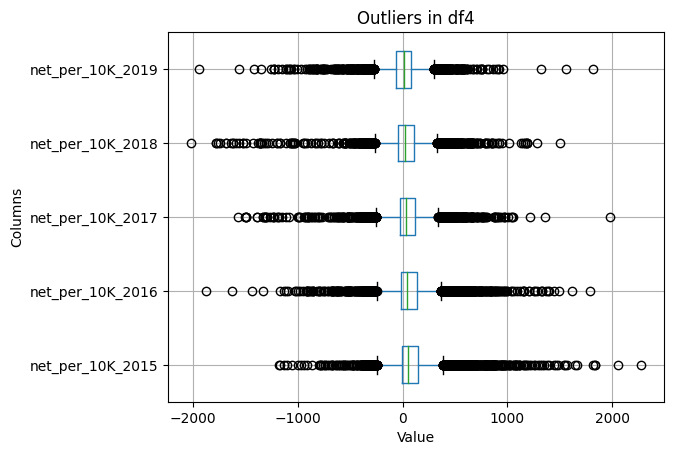

In [342]:

# Select the columns to check for outliers
columns = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]

# Create a pandas DataFrame with the selected columns
data = pd.DataFrame(df4.select(columns).collect(), columns=columns)

# Create box plots for the columns
data.boxplot(column=columns, vert=False)

# Set the plot title and labels
plt.title("Outliers in df4")
plt.xlabel("Value")
plt.ylabel("Columns")

# Display the plot
plt.show()


In [343]:
df5.describe().show()


+-------+------------+------------+-------------------+-------------------+-----------------+--------------------+----------------+-------------------+------------------+------------------+-------------------+------------------+
|summary|country_code|country_name|          wb_income|          wb_region|   skill_group_id|skill_group_category|skill_group_name|   net_per_10K_2015|  net_per_10K_2016|  net_per_10K_2017|   net_per_10K_2018|  net_per_10K_2019|
+-------+------------+------------+-------------------+-------------------+-----------------+--------------------+----------------+-------------------+------------------+------------------+-------------------+------------------+
|  count|       17617|       17617|              17617|              17617|            17617|               17617|           17617|              17617|             17617|             17617|              17617|             17617|
|   mean|        null|        null|               null|               null|6768.8893

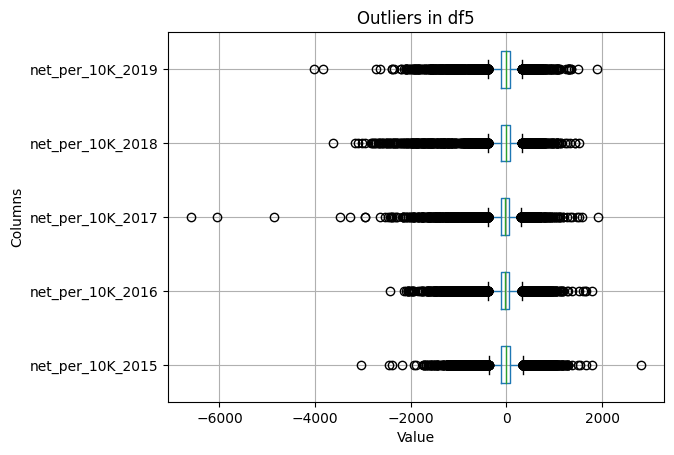

In [344]:

# Select the columns to check for outliers
columns = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]

# Create a pandas DataFrame with the selected columns
data = pd.DataFrame(df5.select(columns).collect(), columns=columns)

# Create box plots for the columns
data.boxplot(column=columns, vert=False)

# Set the plot title and labels
plt.title("Outliers in df5")
plt.xlabel("Value")
plt.ylabel("Columns")

# Display the plot
plt.show()


In [345]:
# Filter out the outlier
df5 = df5.filter(col("net_per_10K_2017") >= -6000)

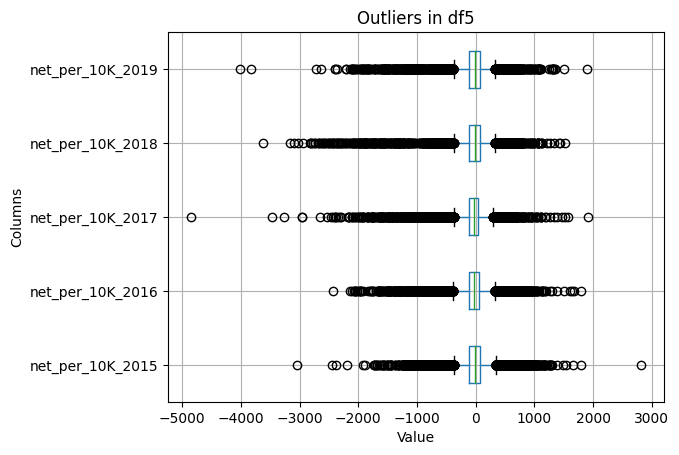

In [346]:

# Select the columns to check for outliers
columns = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]

# Create a pandas DataFrame with the selected columns
data = pd.DataFrame(df5.select(columns).collect(), columns=columns)

# Create box plots for the columns
data.boxplot(column=columns, vert=False)

# Set the plot title and labels
plt.title("Outliers in df5")
plt.xlabel("Value")
plt.ylabel("Columns")

# Display the plot
plt.show()


# selected Featuers

In [368]:
# Filter countries in the Middle East & North Africa from df2
mena_countries_df2 = df2.filter(col("wb_region") == "Middle East & North Africa")


In [377]:
from pyspark.sql.functions import col, expr

# Remove the percentage sign and cast growth rate columns to float
mena_countries_df2 = mena_countries_df2.withColumn(
    "avg_growth_rate",
    expr("(growth_rate_2015 + growth_rate_2016 + growth_rate_2017 + growth_rate_2018 + growth_rate_2019) / 5")
).withColumn(
    "growth_rate_2015",
    expr("replace(growth_rate_2015, '%', '')").cast("float")
).withColumn(
    "growth_rate_2016",
    expr("replace(growth_rate_2016, '%', '')").cast("float")
).withColumn(
    "growth_rate_2017",
    expr("replace(growth_rate_2017, '%', '')").cast("float")
).withColumn(
    "growth_rate_2018",
    expr("replace(growth_rate_2018, '%', '')").cast("float")
).withColumn(
    "growth_rate_2019",
    expr("replace(growth_rate_2019, '%', '')").cast("float")
)

# Show the DataFrame with the added column
mena_countries_df2.show()


+------------+--------------------+--------------------+-----------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+--------------------+
|country_code|        country_name|           wb_region|  wb_income|isic_section_index|   isic_section_name|industry_id|       industry_name|growth_rate_2015|growth_rate_2016|growth_rate_2017|growth_rate_2018|growth_rate_2019|     avg_growth_rate|
+------------+--------------------+--------------------+-----------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+--------------------+
|          ae|United Arab Emirates|Middle East & Nor...|High income|                 B|Mining and quarrying|         56|     Mining & Metals|             7.8|            5.85|            4.34|             1.0|           -0.06|   3.786000061035156|
|       

In [370]:
from pyspark.sql.functions import col

mena_df5 = df5.filter(col("wb_region") == "Middle East & North Africa")

In [371]:
mena_df5.show()

+------------+------------+-------------------+--------------------+--------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+
|country_code|country_name|          wb_income|           wb_region|skill_group_id|skill_group_category|    skill_group_name|net_per_10K_2015|net_per_10K_2016|net_per_10K_2017|net_per_10K_2018|net_per_10K_2019|
+------------+------------+-------------------+--------------------+--------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+
|          dz|     Algeria|Upper middle income|Middle East & Nor...|          2130|         Tech Skills|Software Developm...|         -274.27|         -477.93|          -551.8|         -541.84|         -599.54|
|          dz|     Algeria|Upper middle income|Middle East & Nor...|          2279|Disruptive Tech S...|   Development Tools|         -316.46|         -452.

In [378]:
mena_df5_UM  = mena_df5.filter(col("wb_income") == "Upper middle income")
mena_df5_LM  = mena_df5.filter(col("wb_income") == "Lower middle income")
mena_df5_H  = mena_df5.filter(col("wb_income") == "High income")
mena_df5_L  = mena_df5.filter(col("wb_income") == "Low income")


In [373]:
from pyspark.sql.functions import col

# Calculate the average of net_per_10K columns
mena_df5 = mena_df5.withColumn(
    "avg_net_per_10K",
    (col("net_per_10K_2015") + col("net_per_10K_2016") + col("net_per_10K_2017") + col("net_per_10K_2018") + col("net_per_10K_2019")) / 5
)

# Display the updated DataFrame
mena_df5.show()


+------------+------------+-------------------+--------------------+--------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+-------------------+
|country_code|country_name|          wb_income|           wb_region|skill_group_id|skill_group_category|    skill_group_name|net_per_10K_2015|net_per_10K_2016|net_per_10K_2017|net_per_10K_2018|net_per_10K_2019|    avg_net_per_10K|
+------------+------------+-------------------+--------------------+--------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+-------------------+
|          dz|     Algeria|Upper middle income|Middle East & Nor...|          2130|         Tech Skills|Software Developm...|         -274.27|         -477.93|          -551.8|         -541.84|         -599.54|           -489.076|
|          dz|     Algeria|Upper middle income|Middle East & Nor...|        

In [374]:

mena_df4 = df4.filter(col("wb_region") == "Middle East & North Africa")

In [375]:
mena_B_df3 = df3.filter(col("base_country_wb_region") == "Middle East & North Africa")

In [376]:
mena_T_df3 = df3.filter(col("target_country_wb_region") == "Middle East & North Africa")

# Q1


thoes are the countries that locate in Middle East & North Africa

In [379]:
# Filter countries in the Middle East & North Africa from df2
mena_countries  = df2.filter(col("wb_region") == "Middle East & North Africa").select("country_name").distinct()

# Display the list of countries
mena_countries .show(truncate=False)

+--------------------+
|country_name        |
+--------------------+
|Iraq                |
|Jordan              |
|Algeria             |
|Iran, Islamic Rep.  |
|Qatar               |
|Kuwait              |
|Malta               |
|Morocco             |
|Israel              |
|Oman                |
|Egypt, Arab Rep.    |
|Libya               |
|Tunisia             |
|Saudi Arabia        |
|United Arab Emirates|
|West Bank and Gaza  |
|Lebanon             |
|Yemen, Rep.         |
|Bahrain             |
|Syrian Arab Republic|
+--------------------+



# Q2





Which industries are present in all countries of the Middle East & North Africa region?  we use df4 (country_name, wb_region is Middle East & North Africa, industry_name is in all country_name)


In [380]:

# Get the list of industries present in all Middle East & North Africa countries
industries_in_mena = mena_countries.join(df2, "country_name").groupBy("industry_name").count().filter(col("count") == mena_countries.count()).select("industry_name")

# Display the list of industries
industries_in_mena.show(truncate=False)


+-------------------------------------+
|industry_name                        |
+-------------------------------------+
|Financial Services                   |
|Accounting                           |
|Internet                             |
|Oil & Energy                         |
|Electrical & Electronic Manufacturing|
|Computer Software                    |
|Automotive                           |
|Telecommunications                   |
|Design                               |
|Information Technology & Services    |
|Marketing & Advertising              |
|Banking                              |
|Pharmaceuticals                      |
|Management Consulting                |
+-------------------------------------+



# Q3

In [381]:
from pyspark.sql.functions import col, desc


# Find the country with the highest net job growth rate
highest_growth_country = mena_countries_df2.orderBy(desc("avg_growth_rate")).select("country_name", "industry_name", "avg_growth_rate").first()

# Find the country with the lowest net job growth rate
lowest_growth_country = mena_countries_df2.orderBy("avg_growth_rate").select("country_name", "industry_name", "avg_growth_rate").first()

# Display the results
print("Country with the highest net job growth rate:")
print(highest_growth_country)

print("Country with the lowest net job growth rate:")
print(lowest_growth_country)


Country with the highest net job growth rate:
Row(country_name='Saudi Arabia', industry_name='Railroad Manufacture', avg_growth_rate=24.189999389648438)
Country with the lowest net job growth rate:
Row(country_name='Tunisia', industry_name='Semiconductors', avg_growth_rate=-19.070001220703126)


# Q4

Which skill categories have experienced the most significant demand in the Middle East & North Africa region? (skill_group_name, wb_region) as the most repeated skill_group_name for diffrant income types

In [382]:

# Group by skill_group_name and count the occurrences
top_skills_UM= mena_df5_UM.groupBy("skill_group_name").count()

# Sort by count in descending order and select top 10
top_skills_UM = top_skills_UM.orderBy(col("count").desc()).limit(5)

# Display the result
top_skills_UM.show()


+--------------------+-----+
|    skill_group_name|count|
+--------------------+-----+
|           Oil & Gas|    6|
|       Public Safety|    6|
|   International Law|    6|
|       Cybersecurity|    6|
|Manufacturing Ope...|    6|
+--------------------+-----+



In [383]:

# Group by skill_group_name and count the occurrences
top_skills_LM = mena_df5_LM.groupBy("skill_group_name").count()

# Sort by count in descending order and select top 10
top_skills_LM = top_skills_LM.orderBy(col("count").desc()).limit(5)

# Display the result
top_skills_LM.show()


+--------------------+-----+
|    skill_group_name|count|
+--------------------+-----+
|   International Law|    4|
|Manufacturing Ope...|    4|
|       Cybersecurity|    4|
|   Digital Marketing|    4|
|Corporate Communi...|    4|
+--------------------+-----+



In [384]:

# Group by skill_group_name and count the occurrences
top_skills_L = mena_df5_L.groupBy("skill_group_name").count()

# Sort by count in descending order and select top 10
top_skills_L = top_skills_L.orderBy(col("count").desc()).limit(5)

# Display the result
top_skills_L.show()


+--------------------+-----+
|    skill_group_name|count|
+--------------------+-----+
|   International Law|    2|
|            Teaching|    2|
|Manufacturing Ope...|    2|
|       Public Safety|    2|
|           Oil & Gas|    2|
+--------------------+-----+



In [385]:

# Group by skill_group_name and count the occurrences
top_skills_H = mena_df5_H.groupBy("skill_group_name").count()

# Sort by count in descending order and select top 10
top_skills_H = top_skills_H.orderBy(col("count").desc()).limit(5)

# Display the result
top_skills_H.show()


+--------------------+-----+
|    skill_group_name|count|
+--------------------+-----+
|   Travel Management|    8|
|Administrative As...|    8|
|Information Manag...|    8|
|  Investment Banking|    8|
|    Entrepreneurship|    8|
+--------------------+-----+



# Q5

what is the highest and lowest NetFlow for skills through the years from 2015 to 2019 in the Middle East & North African countries?
(skill_group_name, avg_net_per_10K, wb_region)

In [386]:

# Sort by average net_per_10K in descending order
sorted_netflow_df = mena_df5 .orderBy(desc("avg_net_per_10K"))

# Select the skill group with the highest and lowest average net_per_10K
highest_netflow = sorted_netflow_df.first()
lowest_netflow = sorted_netflow_df.orderBy("avg_net_per_10K").first()

# Display the results
print("Skill with the highest NetFlow:")
print(highest_netflow["skill_group_name"], highest_netflow["avg_net_per_10K"], "in Middle East & North Africa")

print("Skill with the lowest NetFlow:")
print(lowest_netflow["skill_group_name"], lowest_netflow["avg_net_per_10K"], "in Middle East & North Africa")


Skill with the highest NetFlow:
Artificial Intelligence (AI) 970.2719999999999 in Middle East & North Africa
Skill with the lowest NetFlow:
Mobile Application Development -1401.6560000000002 in Middle East & North Africa


# Q6

 which countries in the Middle East & North African countries have  net gain of members for each year?
 use mena_df4 and columns (country_name, wb_region,net_per_10K_2015	net_per_10K_2016	net_per_10K_2017	net_per_10K_2018	net_per_10K_2019)

In [387]:
from pyspark.sql.functions import col

# Define the list of year columns
year_columns = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]

# Iterate over each year column
for year_col in year_columns:
    # Select relevant columns and sort by the year column in descending order
    sorted_df = mena_df4.select("country_name", "wb_region", year_col).orderBy(col(year_col).desc())

    # Select the first row to get the country with the highest net_per_10K gain for that year
    highest_gain_country = sorted_df.first()

    # Display the result
    print(f"For {year_col}:")
    print("Country with the highest net_per_10K gain:")
    print(highest_gain_country["country_name"], highest_gain_country["wb_region"], highest_gain_country[year_col])
    print()


For net_per_10K_2015:
Country with the highest net_per_10K gain:
United Arab Emirates Middle East & North Africa 2280.6

For net_per_10K_2016:
Country with the highest net_per_10K gain:
United Arab Emirates Middle East & North Africa 1616.52

For net_per_10K_2017:
Country with the highest net_per_10K gain:
United Arab Emirates Middle East & North Africa 1362.36

For net_per_10K_2018:
Country with the highest net_per_10K gain:
United Arab Emirates Middle East & North Africa 1187.61

For net_per_10K_2019:
Country with the highest net_per_10K gain:
Qatar Middle East & North Africa 955.84



In [388]:

# Iterate over each year column
for year_col in year_columns:
    # Select relevant columns and sort by the year column in ascending order
    sorted_df = mena_df4.select("country_name", "wb_region", year_col).orderBy(col(year_col).asc())

    # Select the first row to get the country with the lowest net_per_10K gain for that year
    lowest_gain_country = sorted_df.first()

    # Display the result
    print(f"For {year_col}:")
    print("Country with the lowest net_per_10K gain:")
    print(lowest_gain_country["country_name"], lowest_gain_country["wb_region"], lowest_gain_country[year_col])
    print()

For net_per_10K_2015:
Country with the lowest net_per_10K gain:
Bahrain Middle East & North Africa -998.98

For net_per_10K_2016:
Country with the lowest net_per_10K gain:
Kuwait Middle East & North Africa -1876.78

For net_per_10K_2017:
Country with the lowest net_per_10K gain:
Kuwait Middle East & North Africa -1495.33

For net_per_10K_2018:
Country with the lowest net_per_10K gain:
Bahrain Middle East & North Africa -1358.05

For net_per_10K_2019:
Country with the lowest net_per_10K gain:
Bahrain Middle East & North Africa -1111.57



#Q7

what are the top countries that users emigrate from in the Middle East & North African countries for each wb_incom?
use mena_B_df3 dataframe and columns (base_country_name base_country_wb_income)

In [389]:
from pyspark.sql.functions import col

# Group by base_country_wb_income and base_country_name, count occurrences
emigration_counts_B = mena_B_df3.groupBy("base_country_wb_income", "base_country_name").count()

# Rank the countries within each base_country_wb_income category based on count in descending order
from pyspark.sql.window import Window
from pyspark.sql.functions import desc, rank

window_spec = Window.partitionBy("base_country_wb_income").orderBy(desc("count"))
ranked_emigration_counts_B = emigration_counts_B.withColumn("rank", rank().over(window_spec))

# Select the top country for each base_country_wb_income category
top_emigration_countries_B = ranked_emigration_counts_B.filter(col("rank") == 1).select("base_country_wb_income", "base_country_name", "count")

# Display the results
top_emigration_countries_B.show(truncate=False)


+----------------------+--------------------+-----+
|base_country_wb_income|base_country_name   |count|
+----------------------+--------------------+-----+
|High Income           |United Arab Emirates|93   |
|Low Income            |Syrian Arab Republic|14   |
|Lower Middle Income   |Egypt, Arab Rep.    |42   |
|Upper Middle Income   |Iran, Islamic Rep.  |29   |
+----------------------+--------------------+-----+



#Q8

predict the growth rate for each Middle East & North African country in 2020?
user mena_countries_df2 and use the columns growth_rate_2015|growth_rate_2016|growth_rate_2017|growth_rate_2018|growth_rate_2019|     avg_growth_rate to predict growth_rate_2020

tain be 80% and testing 20%

In [390]:
mena_countries_df2.show()


+------------+--------------------+--------------------+-----------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+--------------------+
|country_code|        country_name|           wb_region|  wb_income|isic_section_index|   isic_section_name|industry_id|       industry_name|growth_rate_2015|growth_rate_2016|growth_rate_2017|growth_rate_2018|growth_rate_2019|     avg_growth_rate|
+------------+--------------------+--------------------+-----------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+--------------------+
|          ae|United Arab Emirates|Middle East & Nor...|High income|                 B|Mining and quarrying|         56|     Mining & Metals|             7.8|            5.85|            4.34|             1.0|           -0.06|   3.786000061035156|
|       

In [391]:
from pyspark.sql.functions import lit

mena_countries_df2 = mena_countries_df2.withColumn("growth_rate_2020", lit(0.0))


In [392]:
from pyspark.ml.feature import VectorAssembler

# Select the desired columns
selected_columns = ["growth_rate_2019", "growth_rate_2020"]

# Create the feature vector
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
feature_vector = assembler.transform(mena_countries_df2)

# Select the feature vector and the target variable
data = feature_vector.select("features", "growth_rate_2020")

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train the linear regression model
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(labelCol="growth_rate_2020")
lr_model = lr.fit(train_data)

# Perform the prediction
predictions = lr_model.transform(test_data)

# Display the predictions
predictions.show()


+--------------------+----------------+----------+
|            features|growth_rate_2020|prediction|
+--------------------+----------------+----------+
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|[-8.0799999237060...|         

In [393]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler

# Select the relevant columns for prediction
selected_features = ["growth_rate_2018", "growth_rate_2019"]

# Create a VectorAssembler to combine the selected features into a feature vector
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")

# Transform the data by assembling the feature vector
prediction_data = assembler.transform(mena_countries_df2)

# Select the feature vector and the target variable
prediction_data = prediction_data.select("features", "growth_rate_2020")

# Split the data into training and test sets
train_data, test_data = prediction_data.randomSplit([0.7, 0.3], seed=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(featuresCol="features", labelCol="growth_rate_2020")

# Fit the model to the training data
rf_model = rf_model.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Display the predictions
predictions.show()


+--------------------+----------------+----------+
|            features|growth_rate_2020|prediction|
+--------------------+----------------+----------+
|           (2,[],[])|             0.0|       0.0|
|           (2,[],[])|             0.0|       0.0|
|[-17.040000915527...|             0.0|       0.0|
|[-15.479999542236...|             0.0|       0.0|
|[-12.0,-5.7100000...|             0.0|       0.0|
|[-11.829999923706...|             0.0|       0.0|
|[-11.760000228881...|             0.0|       0.0|
|[-10.260000228881...|             0.0|       0.0|
|[-9.9600000381469...|             0.0|       0.0|
|[-9.5200004577636...|             0.0|       0.0|
|[-9.2299995422363...|             0.0|       0.0|
|[-8.0600004196167...|             0.0|       0.0|
|[-7.9499998092651...|             0.0|       0.0|
|[-7.7300000190734...|             0.0|       0.0|
|[-7.5300002098083...|             0.0|       0.0|
|[-7.3099999427795...|             0.0|       0.0|
|[-7.1599998474121...|         

# Visualizations

In [394]:
df2.show()

+------------+--------------------+--------------------+-----------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+
|country_code|        country_name|           wb_region|  wb_income|isic_section_index|   isic_section_name|industry_id|       industry_name|growth_rate_2015|growth_rate_2016|growth_rate_2017|growth_rate_2018|growth_rate_2019|
+------------+--------------------+--------------------+-----------+------------------+--------------------+-----------+--------------------+----------------+----------------+----------------+----------------+----------------+
|          ae|United Arab Emirates|Middle East & Nor...|High income|                 B|Mining and quarrying|         56|     Mining & Metals|           7.80%|           5.85%|           4.34%|           1.00%|          -0.06%|
|          ae|United Arab Emirates|Middle East & Nor...|High income|                 B|Minin

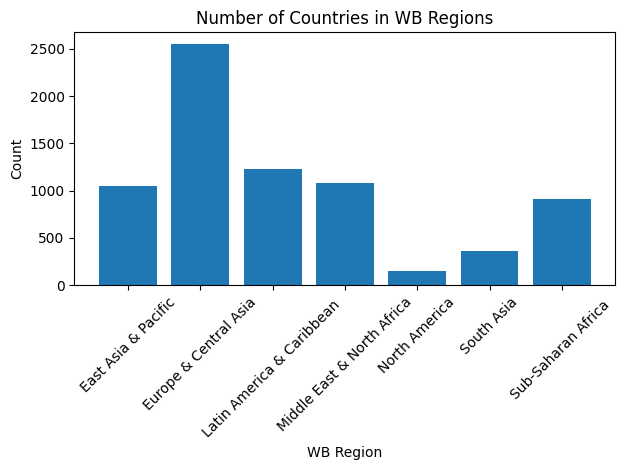

In [395]:
import matplotlib.pyplot as plt

# Group by wb_region and count occurrences
region_counts = df2.groupBy("wb_region").count().orderBy("wb_region")

# Extract the required columns
regions = region_counts.select("wb_region").rdd.flatMap(lambda x: x).collect()
counts = region_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Plot the graph
fig, ax = plt.subplots()
x = range(len(regions))

ax.bar(x, counts)
ax.set_xlabel('WB Region')
ax.set_ylabel('Count')
ax.set_title('Number of Countries in WB Regions')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45)
plt.tight_layout()

plt.show()


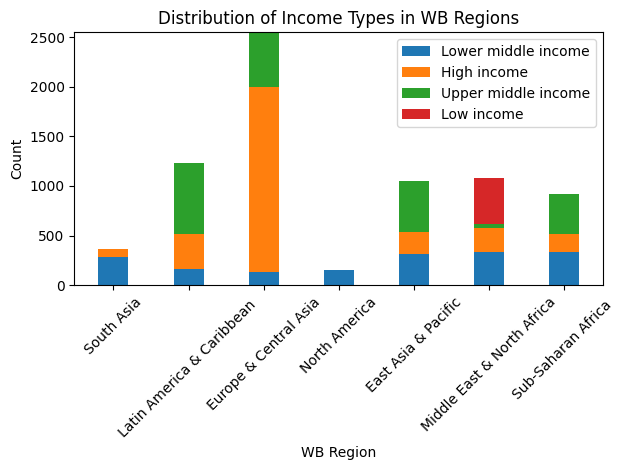

In [396]:
import matplotlib.pyplot as plt

# Group by wb_region and wb_income, count occurrences
income_counts = df2.groupBy("wb_region", "wb_income").count().orderBy("wb_region")

# Extract the required columns
regions = income_counts.select("wb_region").distinct().rdd.flatMap(lambda x: x).collect()
income_types = income_counts.select("wb_income").distinct().rdd.flatMap(lambda x: x).collect()

# Prepare data for plotting
data = {}
for region in regions:
    counts = income_counts.filter(income_counts.wb_region == region).select("count").rdd.flatMap(lambda x: x).collect()
    data[region] = counts

# Plot the graph
fig, ax = plt.subplots()
width = 0.4
x = range(len(regions))

bottom = [0] * len(regions)
for income_type in income_types:
    counts = [data[region][income_types.index(income_type)] if income_types.index(income_type) < len(data[region]) else 0 for region in regions]
    ax.bar(x, counts, width, bottom=bottom, label=income_type)
    bottom = [b + c for b, c in zip(bottom, counts)]

ax.set_xlabel('WB Region')
ax.set_ylabel('Count')
ax.set_title('Distribution of Income Types in WB Regions')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [397]:
df3.show()

+-----------------+--------------------+---------+---------+----------------------+----------------------+-------------------+-------------------+----------+-----------+------------------------+------------------------+----------------+----------------+----------------+----------------+----------------+
|base_country_code|   base_country_name| base_lat|base_long|base_country_wb_income|base_country_wb_region|target_country_code|target_country_name|target_lat|target_long|target_country_wb_income|target_country_wb_region|net_per_10K_2015|net_per_10K_2016|net_per_10K_2017|net_per_10K_2018|net_per_10K_2019|
+-----------------+--------------------+---------+---------+----------------------+----------------------+-------------------+-------------------+----------+-----------+------------------------+------------------------+----------------+----------------+----------------+----------------+----------------+
|               ae|United Arab Emirates|23.424076|53.847818|           High Income|  

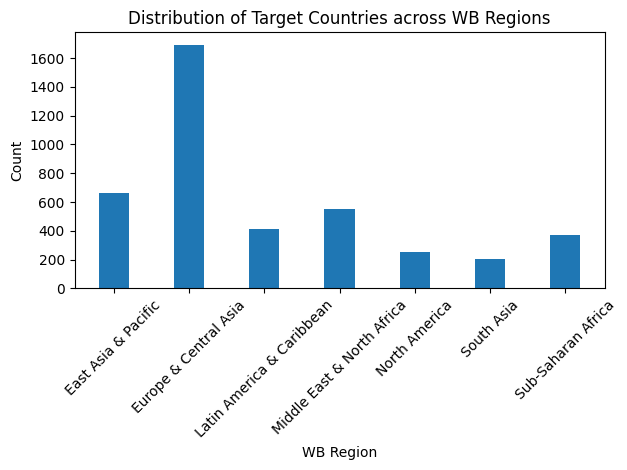

In [398]:
import matplotlib.pyplot as plt

# Group by wb_region and count occurrences
region_counts = df3.groupBy("target_country_wb_region").count().orderBy("target_country_wb_region")

# Extract the required columns
regions = region_counts.select("target_country_wb_region").rdd.flatMap(lambda x: x).collect()
counts = region_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Plot the graph
fig, ax = plt.subplots()
width = 0.4
x = range(len(regions))

ax.bar(x, counts, width)

ax.set_xlabel('WB Region')
ax.set_ylabel('Count')
ax.set_title('Distribution of Target Countries across WB Regions')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45)

plt.tight_layout()
plt.show()


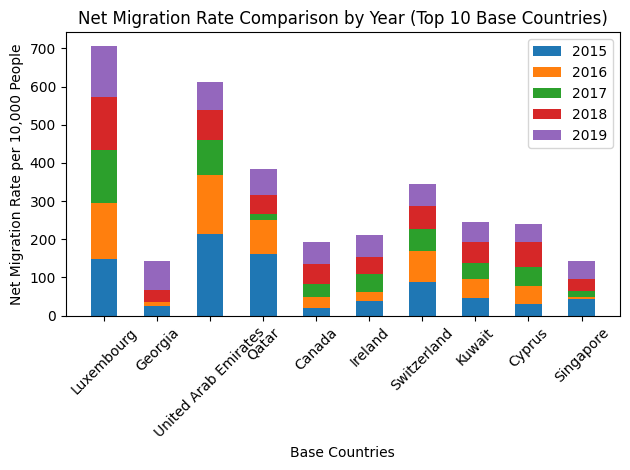

In [298]:
import matplotlib.pyplot as plt

# Filter the data for the top 10 base countries
top_10_countries = df3.groupBy("base_country_name").sum("net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019") \
    .orderBy("sum(net_per_10K_2019)", ascending=False).limit(10)

# Extract the required columns
countries = top_10_countries.select("base_country_name").rdd.flatMap(lambda x: x).collect()
years = ["2015", "2016", "2017", "2018", "2019"]
data = top_10_countries.select("sum(net_per_10K_2015)", "sum(net_per_10K_2016)", "sum(net_per_10K_2017)", "sum(net_per_10K_2018)", "sum(net_per_10K_2019)").collect()

# Prepare the data for the stacked bar chart
income_types = ["2015", "2016", "2017", "2018", "2019"]
x = range(len(countries))
width = 0.5

# Plot the graph
fig, ax = plt.subplots()

for i in range(len(years)):
    counts = [d[i] for d in data]
    if i == 0:
        ax.bar(x, counts, width, label=years[i])
    else:
        bottom = [sum(data[j][:i]) for j in range(len(data))]
        ax.bar(x, counts, width, bottom=bottom, label=years[i])

ax.set_xlabel('Base Countries')
ax.set_ylabel('Net Migration Rate per 10,000 People')
ax.set_title('Net Migration Rate Comparison by Year (Top 10 Base Countries)')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
